# ВЫПУСКНАЯ КВАЛИФИКАЦИОННАЯ РАБОТА 
# по курсу «Data Science»

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
np.set_printoptions(precision=3, suppress=True)
#!pip install openpyxl

In [130]:
#!pip install tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


## Разведочный анализ данных

### Загрузка данных

In [131]:
df_bp=pd.read_excel('X_bp.xlsx', index_col=0)
df_bp

Соотношение матрица-наполнитель  Плотность, кг/м3  \
0.0                            1.857143       2030.000000   
1.0                            1.857143       2030.000000   
2.0                            1.857143       2030.000000   
3.0                            1.857143       2030.000000   
4.0                            2.771331       2030.000000   
...                                 ...               ...   
1018.0                         2.271346       1952.087902   
1019.0                         3.444022       2050.089171   
1020.0                         3.280604       1972.372865   
1021.0                         3.705351       2066.799773   
1022.0                         3.808020       1890.413468   

        модуль упругости, ГПа  Количество отвердителя, м.%  \
0.0                738.736842                    30.000000   
1.0                738.736842                    50.000000   
2.0                738.736842                    49.900000   
3.0                738.736842                   129.000000   
4.0                753.000000                   111.860000   
...                       ...                          ...   
1018.0             912.855545                    86.992183   
1019.0             444.732634                   145.981978   
1020.0             416.836524                   110.533477   
1021.0             741.475517                   141.397963   
1022.0             417.316232                   129.183416   

        Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0.0                           22.267857                100.000000   
1.0                           23.750000                284.615385   
2.0                           33.000000                284.615385   
3.0                           21.250000                300.000000   
4.0                           22.267857                284.615385   
...                                 ...                       ...   
1018.0                        20.123249                324.774576   
1019.0                        19.599769                254.215401   
1020.0                        23.957502                248.423047   
1021.0                        19.246945                275.779840   
1022.0                        27.474763                300.952708   

        Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
0.0                        210.000000                             70.000000   
1.0                        210.000000                             70.000000   
2.0                        210.000000                             70.000000   
3.0                        210.000000                             70.000000   
4.0                        210.000000                             70.000000   
...                               ...                                   ...   
1018.0                     209.198700                             73.090961   
1019.0                     350.660830                             72.920827   
1020.0                     740.142791                             74.734344   
1021.0                     641.468152                             74.042708   
1022.0                     758.747882                             74.309704   

        Прочность при растяжении, МПа  Потребление смолы, г/м2  
0.0                       3000.000000               220.000000  
1.0                       3000.000000               220.000000  
2.0                       3000.000000               220.000000  
3.0                       3000.000000               220.000000  
4.0                       3000.000000               220.000000  
...                               ...                      ...  
1018.0                    2387.292495               125.007669  
1019.0                    2360.392784               117.730099  
1020.0                    2662.906040               236.606764  
1021.0                    2071.715856               197.126067  
1022.0                    2856.328932

In [132]:
df_nup=pd.read_excel('X_nup.xlsx', index_col=0)
df_nup

Угол нашивки, град  Шаг нашивки  Плотность нашивки
0.0                    0.0     4.000000          57.000000
1.0                    0.0     4.000000          60.000000
2.0                    0.0     4.000000          70.000000
3.0                    0.0     5.000000          47.000000
4.0                    0.0     5.000000          57.000000
...                    ...          ...                ...
1035.0                90.0     8.088111          47.759177
1036.0                90.0     7.619138          66.931932
1037.0                90.0     9.800926          72.858286
1038.0                90.0    10.079859          65.519479
1039.0                90.0     9.021043          66.920143

[1040 rows x 3 columns]

Длина датафреймов отличается на 17 строк. При этом в началах датафреймов явно находятся обработанные или дописанные данные. Они имеют округленные значения в отличии от остальных данных имеющих 6 цифр после запятой. Сравним начала датафреймов.

### Объединение данных

In [133]:
#df_bp.head(50)

In [134]:
#df_nup.head(50)

У датафрейма не обработанные значения начинаются с 23-ей строки, а у df_nup с 40-ой. Счтатаю, что склейку надо произвести начиная с этих строк.

In [135]:
df_bp.drop(df_bp.index[0:23],inplace=True)
df_bp=df_bp.reset_index(drop=True)

In [136]:
df_nup.drop(df_nup.index[0:40],inplace=True)
df_nup=df_nup.reset_index(drop=True)

In [137]:
df = df_bp.merge(df_nup, left_index=True,right_index=True, how='inner')

In [138]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           2.587348       1953.274926            1136.596135   
1                           2.499918       1942.595777             901.519947   
2                           2.046471       2037.631811             707.570887   
3                           1.856476       2018.220332             836.294382   
4                           3.305535       1917.907506             478.286247   
..                               ...               ...                    ...   
995                         2.271346       1952.087902             912.855545   
996                         3.444022       2050.089171             444.732634   
997                         3.280604       1972.372865             416.836524   
998                         3.705351       2066.799773             741.475517   
999                         3.808020       1890.413468             417.316232   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     137.627420                        22.344534   
1                     146.252208                        23.081757   
2                     101.617251                        23.146393   
3                     135.401697                        26.435515   
4                     105.786930                        17.874100   
..                           ...                              ...   
995                    86.992183                        20.123249   
996                   145.981978                        19.599769   
997                   110.533477                        23.957502   
998                   141.397963                        19.246945   
999                   129.183416                        27.474763   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  234.716883                     555.893453   
1                  351.231874                     864.725484   
2                  312.307205                     547.601219   
3                  327.510377                     150.961449   
4                  328.154579                     526.692159   
..                        ...                            ...   
995                324.774576                     209.198700   
996                254.215401                     350.660830   
997                248.423047                     740.142791   
998                275.779840                     641.468152   
999                300.952708                     758.747882   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                               80.803222                    2587.342983   
1                               76.178075                    3705.672523   
2                               73.817067                    2624.026407   
3                               77.210762                    2473.187195   
4                               72.345709                    3059.032991   
..                                    ...                            ...   
995                             73.090961                    2387.292495   
996                             72.920827                    2360.392784   
997                             74.734344                    2662.906040   
998                             74.042708                    2071.715856   
999                             74.309704                    2856.328932   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                 246.613117                 0.0     7.856167   
1                 226.222760                 0.0     7.401543   
2                 178.198556                 0.0     6.675780   
3                 123.344561                 0.0     7.526398   
4                 275.575880                 0.0     8.325699   
..                       ...                 ...          ...   
995               125.007669                90.0     8.088111   
9

### Проверка пропусков и дубликатов

In [139]:
df.duplicated().sum()

0

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Соотношение матрица-наполнитель       1000 non-null   float64
 1   Плотность, кг/м3                      1000 non-null   float64
 2   модуль упругости, ГПа                 1000 non-null   float64
 3   Количество отвердителя, м.%           1000 non-null   float64
 4   Содержание эпоксидных групп,%_2       1000 non-null   float64
 5   Температура вспышки, С_2              1000 non-null   float64
 6   Поверхностная плотность, г/м2         1000 non-null   float64
 7   Модуль упругости при растяжении, ГПа  1000 non-null   float64
 8   Прочность при растяжении, МПа         1000 non-null   float64
 9   Потребление смолы, г/м2               1000 non-null   float64
 10  Угол нашивки, град                    1000 non-null   float64
 11  Шаг нашивки       

Пропусков и дубликатов нет

### Средние и медианные значения

In [141]:
df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                      1000.000000       1000.000000   
mean                          2.930612       1975.666791   
std                           0.913939         73.796817   
min                           0.389403       1731.764635   
25%                           2.318526       1924.203433   
50%                           2.907832       1977.574305   
75%                           3.552539       2021.159498   
max                           5.591742       2207.773481   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count            1000.000000                  1000.000000   
mean              739.950520                   110.541116   
std               330.327013                    28.304470   
min                 2.436909                    17.740275   
25%               498.438068                    92.170589   
50%               741.148111                   110.162666   
75%               962.851423                   130.311975   
max              1911.536477                   198.953207   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                      1000.000000               1000.000000   
mean                         22.243850                285.911287   
std                           2.406999                 40.962756   
min                          14.254985                160.255843   
25%                          20.558296                258.539199   
50%                          22.230761                285.853960   
75%                          23.982115                313.581449   
max                          28.955094                413.273418   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                    1000.000000                           1000.000000   
mean                      483.024665                             73.328462   
std                       280.811736                              3.119584   
min                         0.603740                             64.054061   
25%                       268.057473                             71.301753   
50%                       452.972263                             73.247594   
75%                       694.210382                             75.379739   
max                      1399.542362                             82.682051   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                    1000.000000              1000.000000   
mean                     2467.184290               218.386876   
std                       485.624616                59.819777   
min                      1036.856605                33.803026   
25%                      2143.834592               179.190489   
50%                      2461.249253               217.277006   
75%                      2760.163022               257.495647   
max                      3848.436732               414.590628   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count         1000.000000  1000.000000        1000.000000  
mean            45.000000     6.911840          57.245335  
std             45.022517     2.557834          12.338871  
min              0.000000     0.037639          11.740126  
25%              0.000000     5.139108          49.970740  
50%             45.000000     6.913444          57.413594  
75%             90.000000     8.566744          65.107235  
max             90.000000    14.440522         103.988901

### Гистограммы распределения по каждой из переменной

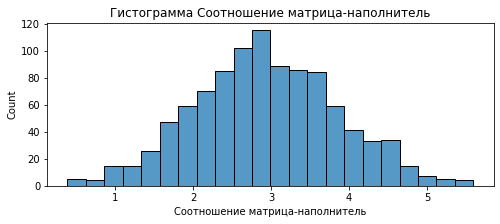

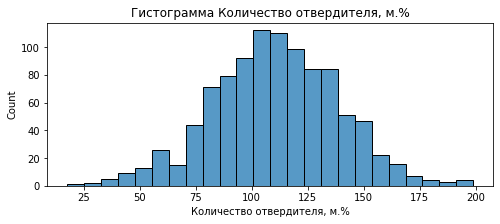

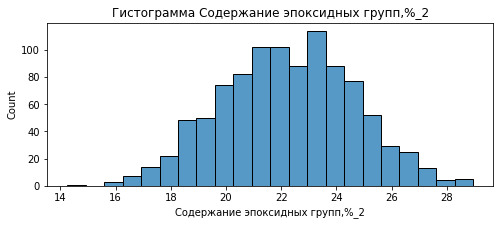

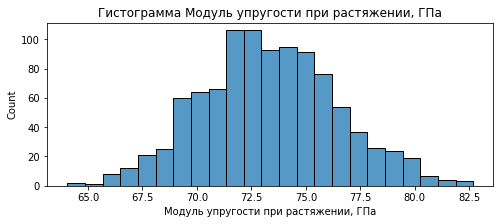

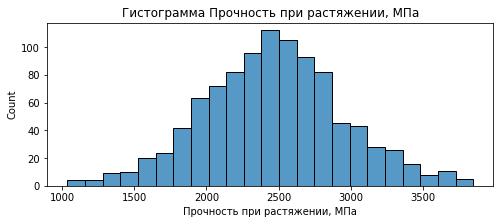

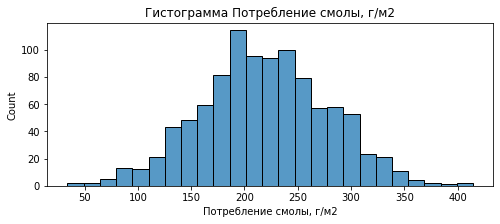

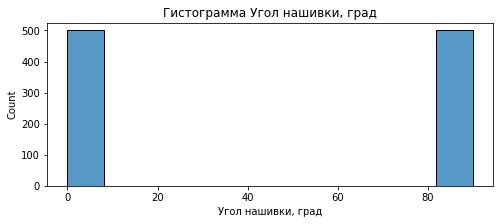

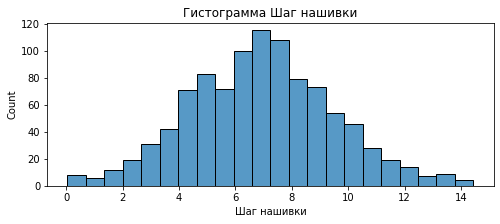

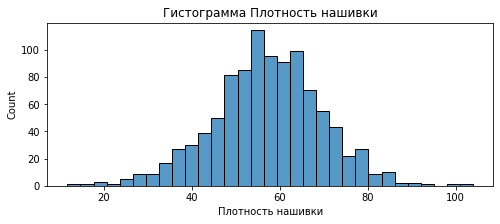

In [142]:
for col in df.columns: 
  plt.figure(figsize=(8, 3))
  plt.title("Гистограмма "+str(col))
  sns.histplot(data=df[col])
  plt.show()

### Даграммы ящика с усами

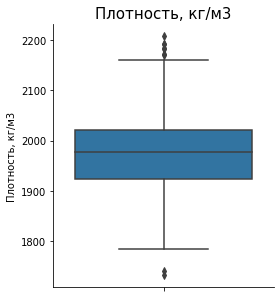

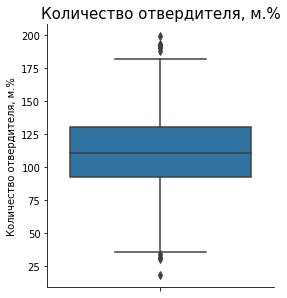

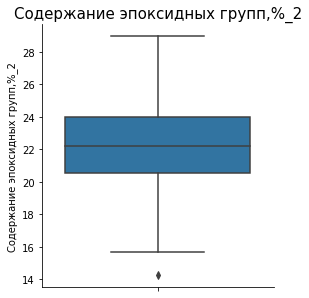

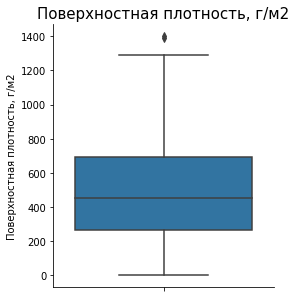

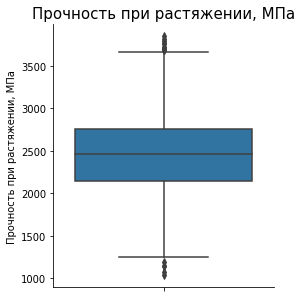

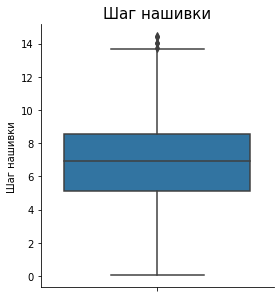

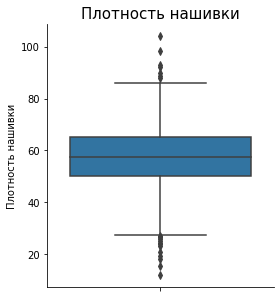

In [143]:
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box', height=4)
    plt.title(col, fontsize=15)

### Попарные графики рассеяния точек

In [144]:
cols = df.columns
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

### Проверка корреляции данных

<AxesSubplot:>

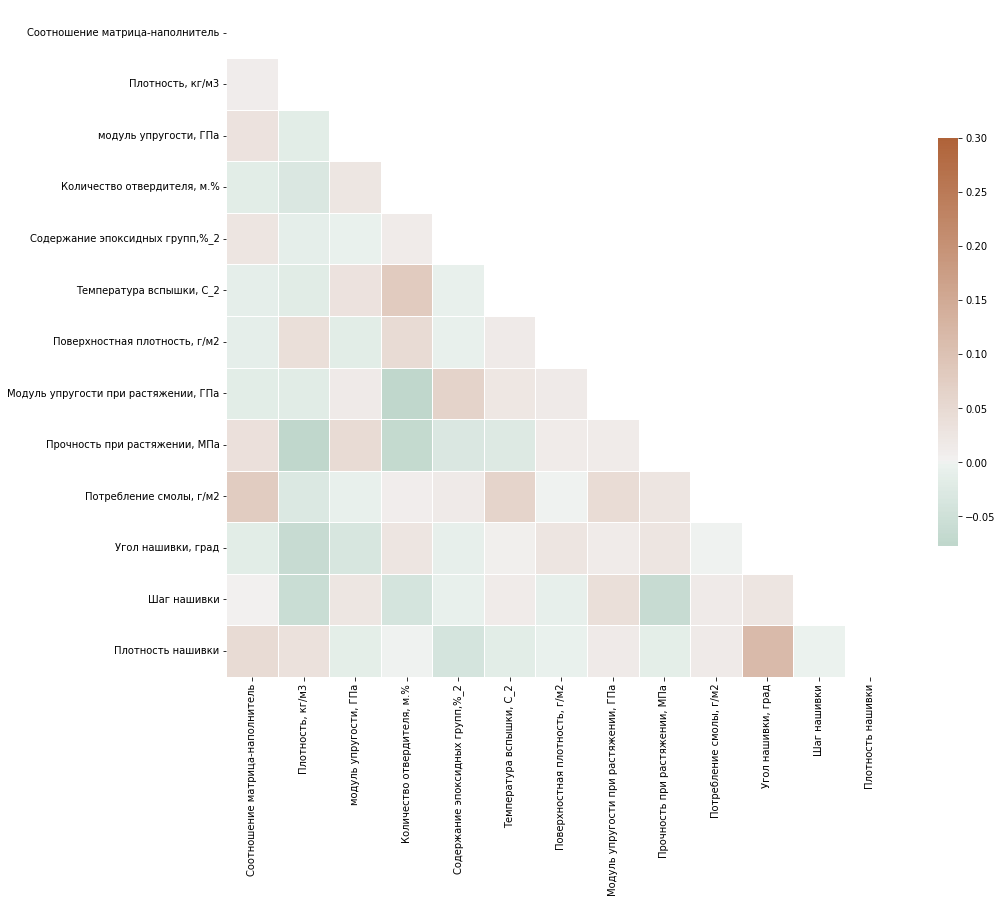

In [145]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(150, 30, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Предобработка данных

### Удаление шумов

In [146]:
#Составим список признаков, у которых более 95% строк содержат одно и то же значение.
num_rows = len(df.index)
low_information_cols = [] #

for col in df.columns:
    cnts = df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Малоинформативные признаки отсутствуют

In [147]:
# очистим данные от выбросов, выбросы заменим nan
for x in df.columns:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [148]:
# проверим какое количество выбросов по каждому столбцу
df.isnull().sum()

Соотношение матрица-наполнитель          6
Плотность, кг/м3                         9
модуль упругости, ГПа                    2
Количество отвердителя, м.%             11
Содержание эпоксидных групп,%_2          1
Температура вспышки, С_2                 7
Поверхностная плотность, г/м2            2
Модуль упругости при растяжении, ГПа     6
Прочность при растяжении, МПа           15
Потребление смолы, г/м2                  8
Угол нашивки, град                       0
Шаг нашивки                              5
Плотность нашивки                       20
dtype: int64

In [149]:
# количество выбросов довольно мало, можно просто удалить эти строки
df = df.dropna(axis = 0)

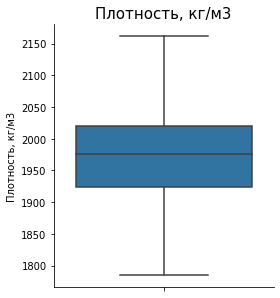

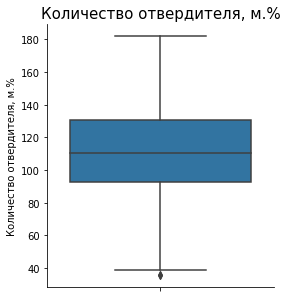

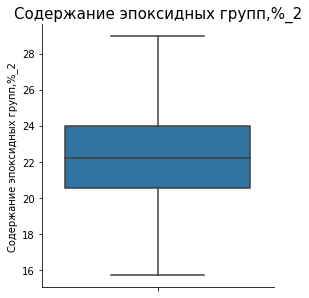

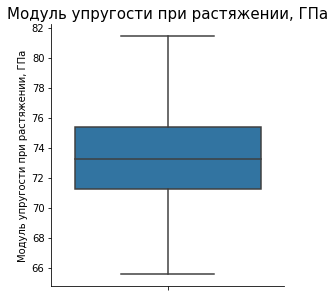

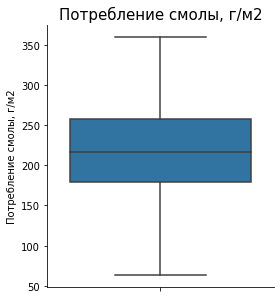

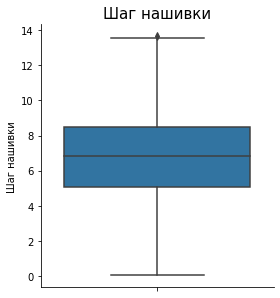

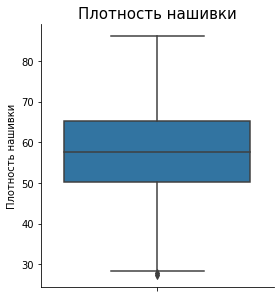

In [150]:
# Визуальная прверка ящиков с усами
for col in df.columns: 
    sns.catplot(y=col, data=df, kind='box', height=4)
    plt.title(col, fontsize=15)

Шумы устранены

### Нормализация

In [151]:
scaler = MinMaxScaler()
norm_df=pd.DataFrame(scaler.fit_transform(df),
            columns=df.columns, index=df.index) 
norm_df.describe()

Соотношение матрица-наполнитель  Плотность, кг/м3  \
count                       918.000000        918.000000   
mean                          0.500218          0.501459   
std                           0.188017          0.187493   
min                           0.000000          0.000000   
25%                           0.375862          0.369395   
50%                           0.495394          0.509410   
75%                           0.629970          0.623503   
max                           1.000000          1.000000   

       модуль упругости, ГПа  Количество отвердителя, м.%  \
count             918.000000                   918.000000   
mean                0.446481                     0.514337   
std                 0.199507                     0.185492   
min                 0.000000                     0.000000   
25%                 0.301059                     0.389511   
50%                 0.443588                     0.512824   
75%                 0.583231                     0.648335   
max                 1.000000                     1.000000   

       Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
count                       918.000000                918.000000   
mean                          0.494241                  0.513918   
std                           0.182174                  0.193223   
min                           0.000000                  0.000000   
25%                           0.366438                  0.382668   
50%                           0.492839                  0.515157   
75%                           0.625870                  0.646827   
max                           1.000000                  1.000000   

       Поверхностная плотность, г/м2  Модуль упругости при растяжении, ГПа  \
count                     918.000000                            918.000000   
mean                        0.374590                              0.489073   
std                         0.215935                              0.191915   
min                         0.000000                              0.000000   
25%                         0.209220                              0.357536   
50%                         0.354161                              0.485020   
75%                         0.538768                              0.618502   
max                         1.000000                              1.000000   

       Прочность при растяжении, МПа  Потребление смолы, г/м2  \
count                     918.000000               918.000000   
mean                        0.501871                 0.521729   
std                         0.188411                 0.195728   
min                         0.000000                 0.000000   
25%                         0.372515                 0.389276   
50%                         0.498724                 0.518249   
75%                         0.622741                 0.654476   
max                         1.000000                 1.000000   

       Угол нашивки, град  Шаг нашивки  Плотность нашивки  
count          918.000000   918.000000         918.000000  
mean             0.515251     0.499511           0.514282  
std              0.500040     0.185649           0.193354  
min              0.000000     0.000000           0.000000  
25%              0.000000     0.370444           0.391601  
50%              1.000000     0.501218           0.514118  
75%              1.000000     0.621479           0.643879  
max              1.000000     1.000000           1.000000

## Обучение моделей для прогноза модуля упругости при растяжении и прочности при растяжении

In [152]:
# Результаты работы каждой модели будем сохранять в отдельную таблицу для последующего выбора оптимальной модели
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
Model_choice = pd.DataFrame(columns=['Model', 'MAE', 'R squared'])
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

In [153]:
# функция для рисования фактического значения и предсказанного
def chart_predict_true(X_test, y_test, test_predictions):
    a = plt.axes(aspect='equal')
    plt.scatter(y_test, test_predictions)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    lims = [0, 1]
    plt.xlim(lims)
    plt.ylim(lims)
    _ = plt.plot(lims, lims)

### Модуль упругости при растяжении

In [154]:
# Удаляем зависимые параметры
df_learning=norm_df.drop(['Прочность при растяжении, МПа'], axis=1)

In [155]:
# Делим дасет на целевые переменные y и набор входных переменных X
X = df_learning
y = X.pop('Модуль упругости при растяжении, ГПа')

In [156]:
# Разделяем выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Модель "Линейная регрессия"

In [157]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [158]:
new_row = {
   'Param': 'Модуль упругости при растяжении',
   'Model': 'LinearRegression', 
   'MAE': mean_absolute_error(y_test, lr.predict(X_test)), 
   'R squared': r2_score(y_test, lr.predict(X_test))
}
Model_choice = Model_choice.append(new_row, ignore_index=True)

C:\Users\DEll\AppData\Local\Temp/ipykernel_1828/2823949548.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_choice = Model_choice.append(new_row, ignore_index=True)


In [159]:
Model_choice

Model      MAE R squared                            Param
0  LinearRegression  0.15993  0.004973  Модуль упругости при растяжении

In [160]:
test_predictions = lr.predict(X_test).flatten()
chart_predict_true(X_test, y_test, test_predictions)

#### Модель "Случайный лес"

In [161]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [10, 20, 50],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [162]:
rf = GSCV.best_estimator_

In [163]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=50,
                      random_state=42)

In [164]:
new_row = {
   'Param': 'Модуль упругости при растяжении',
   'Model': 'Random Forest', 
   'MAE': mean_absolute_error(y_test, rf.predict(X_test)), 
   'R squared': r2_score(y_test, rf.predict(X_test))
}
Model_choice = Model_choice.append(new_row, ignore_index=True)

C:\Users\DEll\AppData\Local\Temp/ipykernel_1828/879259323.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_choice = Model_choice.append(new_row, ignore_index=True)


In [165]:
Model_choice

Model       MAE R squared                            Param
0  LinearRegression   0.15993  0.004973  Модуль упругости при растяжении
1     Random Forest  0.159777  0.005423  Модуль упругости при растяжении

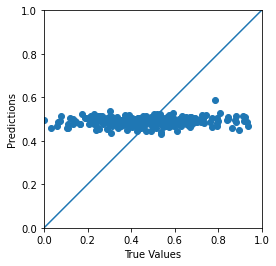

In [166]:
test_predictions = rf.predict(X_test).flatten()
chart_predict_true(X_test, y_test, test_predictions)

#### Модель "k - ближайших соседей"

In [167]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [168]:
new_row = {
   'Param': 'Модуль упругости при растяжении',
   'Model': 'KNeighbors', 
   'MAE': mean_absolute_error(y_test, knn.predict(X_test)), 
   'R squared': r2_score(y_test, knn.predict(X_test))
}
Model_choice = Model_choice.append(new_row, ignore_index=True)

C:\Users\DEll\AppData\Local\Temp/ipykernel_1828/2238573474.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_choice = Model_choice.append(new_row, ignore_index=True)


In [169]:
Model_choice

Model       MAE R squared                            Param
0  LinearRegression   0.15993  0.004973  Модуль упругости при растяжении
1     Random Forest  0.159777  0.005423  Модуль упругости при растяжении
2        KNeighbors  0.174164 -0.183701  Модуль упругости при растяжении

In [170]:
test_predictions = knn.predict(X_test).flatten()
chart_predict_true(X_test, y_test, test_predictions)

### Прочность при растяжении

In [171]:
# Удаляем зависимые параметры
df_learning=norm_df.drop(['Модуль упругости при растяжении, ГПа'], axis=1)

In [172]:
# Делим дасет на целевые переменные y и набор входных переменных X
X = df_learning
y = X.pop('Прочность при растяжении, МПа')

In [173]:
# Разделяем выборки на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Модель "Линейная регрессия"

In [174]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [175]:
new_row = {
   'Param': 'Прочность при растяжении',
   'Model': 'LinearRegression', 
   'MAE': mean_absolute_error(y_test, lr.predict(X_test)), 
   'R squared': r2_score(y_test, lr.predict(X_test))
}
Model_choice = Model_choice.append(new_row, ignore_index=True)

C:\Users\DEll\AppData\Local\Temp/ipykernel_1828/2848173642.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_choice = Model_choice.append(new_row, ignore_index=True)


In [176]:
Model_choice

Model       MAE R squared                            Param
0  LinearRegression   0.15993  0.004973  Модуль упругости при растяжении
1     Random Forest  0.159777  0.005423  Модуль упругости при растяжении
2        KNeighbors  0.174164 -0.183701  Модуль упругости при растяжении
3  LinearRegression  0.153937 -0.033152         Прочность при растяжении

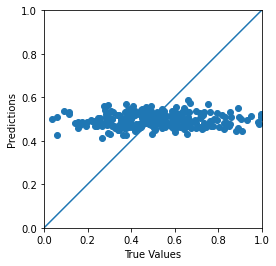

In [177]:
test_predictions = lr.predict(X_test).flatten()
chart_predict_true(X_test, y_test, test_predictions)

#### Модель "Случайный лес"

In [178]:
random_forest_tuning = RandomForestRegressor(random_state = 42)
param_grid = {
   'n_estimators': [10, 20, 50],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth' : [4,5,6],
   'criterion' :['squared_error']
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=10, verbose=0)
GSCV.fit(X_train, y_train)
GSCV.best_params_ 

{'criterion': 'squared_error',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 50}

In [179]:
rf = GSCV.best_estimator_

In [180]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features='sqrt', n_estimators=50,
                      random_state=42)

In [181]:
new_row = {
   'Param': 'Прочность при растяжении',
   'Model': 'Random Forest', 
   'MAE': mean_absolute_error(y_test, rf.predict(X_test)), 
   'R squared': r2_score(y_test, rf.predict(X_test))
}
Model_choice = Model_choice.append(new_row, ignore_index=True)

C:\Users\DEll\AppData\Local\Temp/ipykernel_1828/184484940.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_choice = Model_choice.append(new_row, ignore_index=True)


In [182]:
Model_choice

Model       MAE R squared                            Param
0  LinearRegression   0.15993  0.004973  Модуль упругости при растяжении
1     Random Forest  0.159777  0.005423  Модуль упругости при растяжении
2        KNeighbors  0.174164 -0.183701  Модуль упругости при растяжении
3  LinearRegression  0.153937 -0.033152         Прочность при растяжении
4     Random Forest  0.154312 -0.030674         Прочность при растяжении

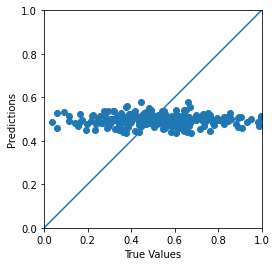

In [183]:
test_predictions = rf.predict(X_test).flatten()
chart_predict_true(X_test, y_test, test_predictions)

#### Модель "k - ближайших соседей"

In [184]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [185]:
new_row = {
   'Param': 'Прочность при растяжении',
   'Model': 'KNeighbors', 
   'MAE': mean_absolute_error(y_test, knn.predict(X_test)), 
   'R squared': r2_score(y_test, knn.predict(X_test))
}
Model_choice = Model_choice.append(new_row, ignore_index=True)

C:\Users\DEll\AppData\Local\Temp/ipykernel_1828/1252082736.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Model_choice = Model_choice.append(new_row, ignore_index=True)


In [186]:
Model_choice

Model       MAE R squared                            Param
0  LinearRegression   0.15993  0.004973  Модуль упругости при растяжении
1     Random Forest  0.159777  0.005423  Модуль упругости при растяжении
2        KNeighbors  0.174164 -0.183701  Модуль упругости при растяжении
3  LinearRegression  0.153937 -0.033152         Прочность при растяжении
4     Random Forest  0.154312 -0.030674         Прочность при растяжении
5        KNeighbors  0.162665  -0.18411         Прочность при растяжении

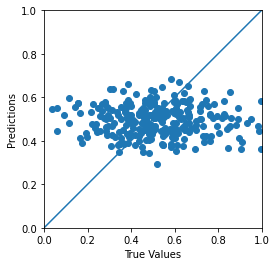

In [187]:
test_predictions = knn.predict(X_test).flatten()
chart_predict_true(X_test, y_test, test_predictions)

## Нейронная сеть для рекомендации соотношения матрица-наполнитель

In [188]:
df

Соотношение матрица-наполнитель  Плотность, кг/м3  модуль упругости, ГПа  \
0                           2.587348       1953.274926            1136.596135   
2                           2.046471       2037.631811             707.570887   
3                           1.856476       2018.220332             836.294382   
4                           3.305535       1917.907506             478.286247   
5                           2.709554       1892.071124             641.052549   
..                               ...               ...                    ...   
995                         2.271346       1952.087902             912.855545   
996                         3.444022       2050.089171             444.732634   
997                         3.280604       1972.372865             416.836524   
998                         3.705351       2066.799773             741.475517   
999                         3.808020       1890.413468             417.316232   

     Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
0                     137.627420                        22.344534   
2                     101.617251                        23.146393   
3                     135.401697                        26.435515   
4                     105.786930                        17.874100   
5                      96.563293                        22.989291   
..                           ...                              ...   
995                    86.992183                        20.123249   
996                   145.981978                        19.599769   
997                   110.533477                        23.957502   
998                   141.397963                        19.246945   
999                   129.183416                        27.474763   

     Температура вспышки, С_2  Поверхностная плотность, г/м2  \
0                  234.716883                     555.893453   
2                  312.307205                     547.601219   
3                  327.510377                     150.961449   
4                  328.154579                     526.692159   
5                  262.956722                     804.592621   
..                        ...                            ...   
995                324.774576                     209.198700   
996                254.215401                     350.660830   
997                248.423047                     740.142791   
998                275.779840                     641.468152   
999                300.952708                     758.747882   

     Модуль упругости при растяжении, ГПа  Прочность при растяжении, МПа  \
0                               80.803222                    2587.342983   
2                               73.817067                    2624.026407   
3                               77.210762                    2473.187195   
4                               72.345709                    3059.032991   
5                               74.511359                    2288.967377   
..                                    ...                            ...   
995                             73.090961                    2387.292495   
996                             72.920827                    2360.392784   
997                             74.734344                    2662.906040   
998                             74.042708                    2071.715856   
999                             74.309704                    2856.328932   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                 246.613117                 0.0     7.856167   
2                 178.198556                 0.0     6.675780   
3                 123.344561                 0.0     7.526398   
4                 275.575880                 0.0     8.325699   
5                 126.816339                 0.0     7.656211   
..                       ...                 ...          ...   
995               125.007669                90.0     8.088111   
9

In [189]:
df=df.drop(['Плотность, кг/м3', 'модуль упругости, ГПа','Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа'], axis=1)

In [190]:
df

Соотношение матрица-наполнитель  Количество отвердителя, м.%  \
0                           2.587348                   137.627420   
2                           2.046471                   101.617251   
3                           1.856476                   135.401697   
4                           3.305535                   105.786930   
5                           2.709554                    96.563293   
..                               ...                          ...   
995                         2.271346                    86.992183   
996                         3.444022                   145.981978   
997                         3.280604                   110.533477   
998                         3.705351                   141.397963   
999                         3.808020                   129.183416   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                          22.344534                234.716883   
2                          23.146393                312.307205   
3                          26.435515                327.510377   
4                          17.874100                328.154579   
5                          22.989291                262.956722   
..                               ...                       ...   
995                        20.123249                324.774576   
996                        19.599769                254.215401   
997                        23.957502                248.423047   
998                        19.246945                275.779840   
999                        27.474763                300.952708   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                 246.613117                 0.0     7.856167   
2                 178.198556                 0.0     6.675780   
3                 123.344561                 0.0     7.526398   
4                 275.575880                 0.0     8.325699   
5                 126.816339                 0.0     7.656211   
..                       ...                 ...          ...   
995               125.007669                90.0     8.088111   
996               117.730099                90.0     7.619138   
997               236.606764                90.0     9.800926   
998               197.126067                90.0    10.079859   
999               194.754342                90.0     9.021043   

     Плотность нашивки  
0            64.301964  
2            78.623299  
3            38.176975  
4            46.045428  
5            33.571024  
..                 ...  
995          47.759177  
996          66.931932  
997          72.858286  
998          65.519479  
999          66.920143  

[918 rows x 8 columns]

In [191]:
X = df.copy()
X

Соотношение матрица-наполнитель  Количество отвердителя, м.%  \
0                           2.587348                   137.627420   
2                           2.046471                   101.617251   
3                           1.856476                   135.401697   
4                           3.305535                   105.786930   
5                           2.709554                    96.563293   
..                               ...                          ...   
995                         2.271346                    86.992183   
996                         3.444022                   145.981978   
997                         3.280604                   110.533477   
998                         3.705351                   141.397963   
999                         3.808020                   129.183416   

     Содержание эпоксидных групп,%_2  Температура вспышки, С_2  \
0                          22.344534                234.716883   
2                          23.146393                312.307205   
3                          26.435515                327.510377   
4                          17.874100                328.154579   
5                          22.989291                262.956722   
..                               ...                       ...   
995                        20.123249                324.774576   
996                        19.599769                254.215401   
997                        23.957502                248.423047   
998                        19.246945                275.779840   
999                        27.474763                300.952708   

     Потребление смолы, г/м2  Угол нашивки, град  Шаг нашивки  \
0                 246.613117                 0.0     7.856167   
2                 178.198556                 0.0     6.675780   
3                 123.344561                 0.0     7.526398   
4                 275.575880                 0.0     8.325699   
5                 126.816339                 0.0     7.656211   
..                       ...                 ...          ...   
995               125.007669                90.0     8.088111   
996               117.730099                90.0     7.619138   
997               236.606764                90.0     9.800926   
998               197.126067                90.0    10.079859   
999               194.754342                90.0     9.021043   

     Плотность нашивки  
0            64.301964  
2            78.623299  
3            38.176975  
4            46.045428  
5            33.571024  
..                 ...  
995          47.759177  
996          66.931932  
997          72.858286  
998          65.519479  
999          66.920143  

[918 rows x 8 columns]

In [192]:
y = X.pop('Соотношение матрица-наполнитель')
y

0      2.587348
2      2.046471
3      1.856476
4      3.305535
5      2.709554
         ...   
995    2.271346
996    3.444022
997    3.280604
998    3.705351
999    3.808020
Name: Соотношение матрица-наполнитель, Length: 918, dtype: float64

In [193]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [194]:
X_train

Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
586                    99.879942                        17.454850   
775                   112.912108                        23.185529   
743                   109.117129                        19.383979   
273                    77.952151                        20.968753   
286                    84.666648                        26.301389   
..                           ...                              ...   
840                    92.228826                        25.610898   
79                    123.506167                        28.324968   
990                    96.749782                        22.146487   
262                   138.699165                        21.909672   
40                     91.660300                        22.676390   

     Температура вспышки, С_2  Потребление смолы, г/м2  Угол нашивки, град  \
586                299.605195               234.335086                90.0   
775                217.896467               311.128215                90.0   
743                306.160227               219.350696                90.0   
273                310.726683               291.531021                 0.0   
286                288.021292               188.892470                 0.0   
..                        ...                      ...                 ...   
840                189.208392               160.744661                90.0   
79                 220.225604               314.698866                 0.0   
990                214.827727                87.270139                90.0   
262                276.393919               307.352077                 0.0   
40                 317.473648               321.145902                 0.0   

     Шаг нашивки  Плотность нашивки  
586     7.955614          75.918566  
775     5.030449          66.586669  
743     2.638172          53.765568  
273     7.401052          66.918583  
286     3.304157          47.487813  
..           ...                ...  
840     7.547816          52.776996  
79      6.232319          77.140355  
990     3.489512          58.828038  
262    12.723886          68.647153  
40      4.516499          45.967283  

[642 rows x 7 columns]

In [195]:
y_train

586    1.538686
775    1.519732
743    3.272840
273    3.202768
286    4.643415
         ...   
840    3.710895
79     3.991633
990    2.310394
262    3.864766
40     4.794711
Name: Соотношение матрица-наполнитель, Length: 642, dtype: float64

In [196]:
composite = np.array(X_train)
composite_normalizer = layers.Normalization(input_shape=[7,], axis=None)
composite_normalizer.adapt(composite)

In [197]:
composite

array([[ 99.88 ,  17.455, 299.605, ...,  90.   ,   7.956,  75.919],
       [112.912,  23.186, 217.896, ...,  90.   ,   5.03 ,  66.587],
       [109.117,  19.384, 306.16 , ...,  90.   ,   2.638,  53.766],
       ...,
       [ 96.75 ,  22.146, 214.828, ...,  90.   ,   3.49 ,  58.828],
       [138.699,  21.91 , 276.394, ...,   0.   ,  12.724,  68.647],
       [ 91.66 ,  22.676, 317.474, ...,   0.   ,   4.516,  45.967]])

In [198]:
composite_normalizer

In [199]:
#X_train['Модуль упругости при растяжении, ГПа','Прочность при растяжении, МПа']

In [200]:
def build_and_compile_model(norm):
    model = keras.Sequential([
      norm,
      layers.Dense(1024, activation='relu'),
      layers.Dense(1024, activation='relu'), 
      layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.0005))
    return model

In [201]:
dnn_composite_model = build_and_compile_model(composite_normalizer)
dnn_composite_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 7)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1024)              8192      
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 1,058,820
Trainable params: 1,058,817
Non-trainable params: 3
_________________________________________________________________


In [202]:
%%time
history = dnn_composite_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=1, epochs=20)

Epoch 1/20
17/17 [==============================] - 1s 18ms/step - loss: 2.2411 - val_loss: 0.9625
Epoch 2/20
17/17 [==============================] - 0s 11ms/step - loss: 0.9349 - val_loss: 0.8356
Epoch 3/20
17/17 [==============================] - 0s 11ms/step - loss: 0.8496 - val_loss: 0.8159
Epoch 4/20
17/17 [==============================] - 0s 11ms/step - loss: 0.8279 - val_loss: 0.7682
Epoch 5/20
17/17 [==============================] - 0s 10ms/step - loss: 0.8550 - val_loss: 0.7465
Epoch 6/20
17/17 [==============================] - 0s 12ms/step - loss: 0.8967 - val_loss: 0.8243
Epoch 7/20
17/17 [==============================] - 0s 10ms/step - loss: 0.8655 - val_loss: 0.8599
Epoch 8/20
17/17 [==============================] - 0s 11ms/step - loss: 0.8039 - val_loss: 0.8799
Epoch 9/20
17/17 [==============================] - 0s 11ms/step - loss: 0.8158 - val_loss: 0.9004
Epoch 10/20
17/17 [==============================] - 0s 11ms/step - loss: 0.8892 - val_loss: 0.8796
Epoch 11/

In [203]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 3])
    plt.xlabel('Эпоха')
    plt.ylabel('MAE [MPG]')
    plt.legend()
    plt.grid(True)

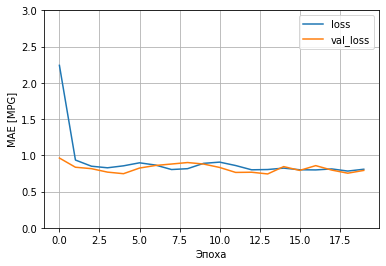

In [204]:
plot_loss(history)

In [158]:
X_test

Количество отвердителя, м.%  Содержание эпоксидных групп,%_2  \
981                    83.191553                        25.627620   
632                    63.526815                        21.616401   
867                   105.938449                        24.791859   
209                   126.109863                        21.950931   
413                   109.907757                        24.090622   
..                           ...                              ...   
69                    102.614962                        17.751531   
440                   102.856973                        21.778325   
394                   154.966325                        24.461730   
310                    61.074494                        22.922922   
667                   118.701288                        19.545169   

     Температура вспышки, С_2  Потребление смолы, г/м2  Угол нашивки, град  \
981                249.612303               266.956745                90.0   
632                296.373995               243.055823                90.0   
867                318.140519                84.490129                90.0   
209                270.407471               200.116156                 0.0   
413                325.877073               145.763464                 0.0   
..                        ...                      ...                 ...   
69                 256.335930               277.746898                 0.0   
440                304.152923               189.650866                 0.0   
394                307.797291               232.183847                 0.0   
310                278.850418               290.577050                 0.0   
667                288.919534               291.125379                90.0   

     Шаг нашивки  Плотность нашивки  
981     6.313201          58.261074  
632     9.057567          68.253199  
867     4.976887          67.110068  
209     2.438243          53.971899  
413    12.452169          44.471612  
..           ...                ...  
69      9.903090          45.319430  
440     7.927846          37.327435  
394    10.110722          80.918147  
310     8.606411          39.452706  
667     9.252672          57.881818  

[276 rows x 7 columns]

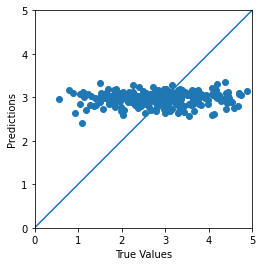

In [159]:
test_predictions = dnn_composite_model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [160]:
y_test.head(30)

981    1.580433
632    2.147426
867    0.927841
209    1.719814
413    2.717223
211    3.353747
711    2.546782
530    2.579047
68     2.041352
970    3.322189
38     3.175765
891    1.093208
995    2.271346
788    2.869846
520    4.681772
298    1.712783
662    1.934229
137    2.314541
671    3.905553
129    1.493196
679    2.558728
7      1.978140
367    4.415465
18     2.465205
744    2.548177
270    2.359900
706    2.951092
574    2.571758
901    1.862875
992    2.806563
Name: Соотношение матрица-наполнитель, dtype: float64

In [161]:
len(y_test)

276

In [162]:
test_predictions

array([2.74 , 2.883, 2.631, 2.964, 2.926, 3.003, 3.045, 2.97 , 3.13 ,
       2.808, 3.047, 2.405, 3.127, 2.924, 2.806, 2.994, 2.918, 3.058,
       3.017, 3.013, 3.106, 2.677, 2.867, 3.041, 2.975, 2.955, 3.045,
       2.892, 3.182, 2.913, 2.953, 2.852, 3.147, 3.108, 2.989, 2.832,
       2.973, 2.801, 3.009, 3.009, 3.08 , 3.234, 3.031, 2.869, 3.088,
       2.878, 3.084, 2.842, 3.105, 3.073, 2.774, 2.841, 3.312, 2.639,
       2.862, 3.088, 3.163, 3.189, 2.87 , 3.175, 3.069, 3.118, 3.042,
       2.928, 2.828, 3.078, 2.904, 2.714, 2.898, 2.916, 2.971, 2.967,
       3.159, 2.875, 3.031, 2.96 , 3.058, 2.837, 3.025, 2.918, 2.939,
       2.835, 3.099, 2.792, 2.948, 2.854, 3.356, 2.865, 3.146, 2.63 ,
       2.839, 2.781, 2.689, 3.019, 2.627, 2.994, 3.03 , 3.033, 2.795,
       3.095, 3.018, 3.003, 2.844, 2.962, 3.013, 3.026, 2.978, 3.079,
       3.337, 2.961, 3.11 , 3.037, 2.982, 3.001, 2.969, 3.096, 3.178,
       2.94 , 2.945, 3.109, 3.181, 3.087, 3.088, 2.971, 3.068, 3.185,
       2.995, 3.057,

In [163]:
len(test_predictions)

276

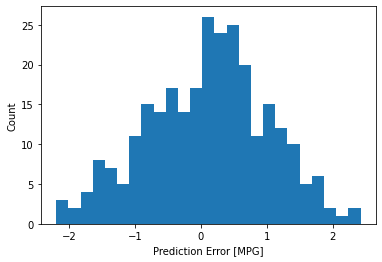

In [164]:
error = test_predictions - y_test
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

# Сохранение нейронной модели

In [81]:
dnn_composite_model.save("models/model_full")

INFO:tensorflow:Assets written to: models/model_full\assets


In [82]:
dnn_composite_model2 = keras.models.load_model("models/model_full")

In [83]:
dnn_composite_model2

In [84]:
dnn_composite_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1464)              11712     
                                                                 
 dense_1 (Dense)             (None, 1464)              2144760   
                                                                 
 dense_2 (Dense)             (None, 1464)              2144760   
                                                                 
 dense_3 (Dense)             (None, 1)                 1465      
                                                                 
Total params: 4,302,700
Trainable params: 4,302,697
Non-trainable params: 3
______________________________________________

In [85]:
import tensorflow as tf

In [86]:
print(tf.__version__)

2.8.0


In [87]:
dnn_composite_model.save("models/model_h5", save_format='h5')

In [89]:
dnn_composite_model3 = keras.models.load_model("models/model_h5")

In [90]:
dnn_composite_model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 7)                3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 1464)              11712     
                                                                 
 dense_1 (Dense)             (None, 1464)              2144760   
                                                                 
 dense_2 (Dense)             (None, 1464)              2144760   
                                                                 
 dense_3 (Dense)             (None, 1)                 1465      
                                                                 
Total params: 4,302,700
Trainable params: 4,302,697
Non-trainable params: 3
______________________________________________